In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

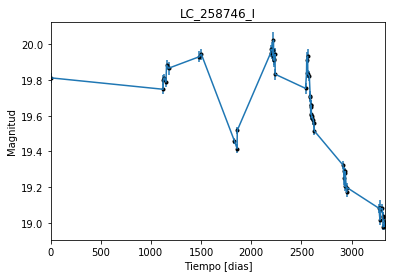

In [2]:
data = np.genfromtxt('LC_258746_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_258746_I')
plt.savefig("LC_258746_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

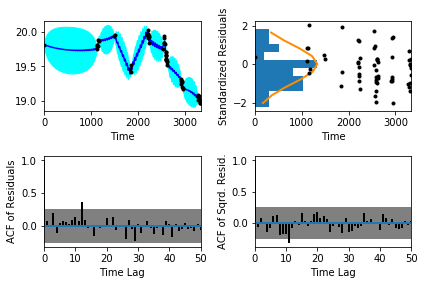

In [5]:
sample.assess_fit()

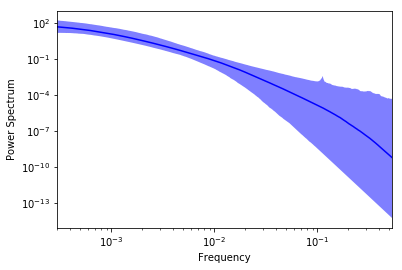

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

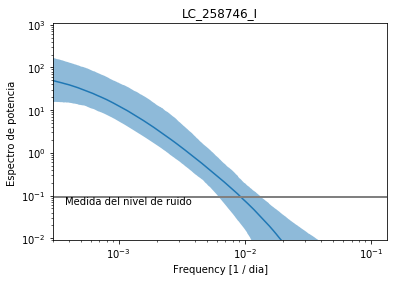

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_258746_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_258746_I')

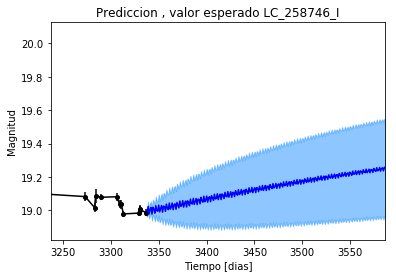

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_258746_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_258746_I')

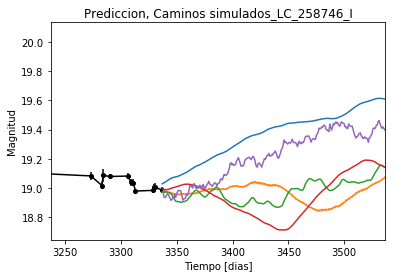

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_258746_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


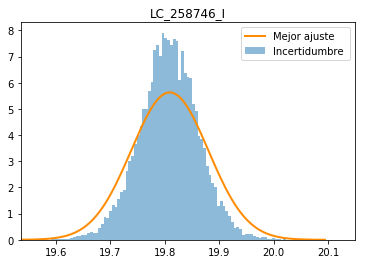

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_258746_I')
plt.savefig("Mejor_ajuste_LC_258746_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_258746_I')

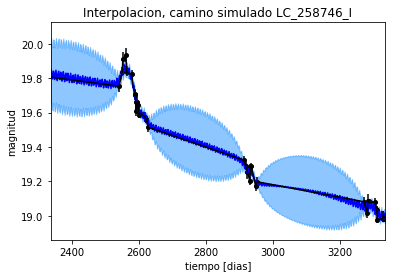

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_258746_I')

Text(0.5,1,'Interpolacion, camino simulado LC_258746_I')

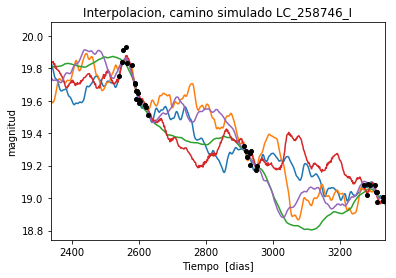

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_258746_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 599.772691775
Median: 0.0155892264186
Standard deviation: 0.220645262615
68% credibility interval: [ 0.00130073  0.24818473]
95% credibility interval: [  3.62884693e-04   8.60956608e-01]
99% credibility interval: [  3.09582804e-04   1.02166609e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 369.108685164
Median: 0.00438766021034
Standard deviation: 0.0954435629743
68% credibility interval: [ 0.00054501  0.04292767]
95% credibility interval: [ 0.0003212   0.31212644]
99% credibility interval: [  3.06812990e-04   6.83808976e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 291.853892367
Median: 0.0311115822172
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2206.89131078
Median: 103.098445644
Standard deviation: 1.85309499856
68% credibility interval: [ 101.10461363  104.46692773]
95% credibility interval: [  98.51012986  105.82122135]
99% credibility interval: [  96.26218223  106.97612916]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 282.473096682
Median: 0.753570915348
Standard deviation: 2.46170886618
68% credibility interval: [ 0.09177735  4.6154582 ]
95% credibility interval: [ 0.03282993  8.62286757]
99% credibility interval: [  0.01585365  10.78225498]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 790.562078934
Median: 1.98167066521
Standard deviation: 10.7166623604
68% credibility interval: [  0.16209133  16.68482926]
95% credibility interval: [  1.05318925

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10489.3252454
Median: 6.19757971675e-26
Standard deviation: 3.80228870422e+70
68% credibility interval: [  1.65703862e-58   1.45120334e-05]
95% credibility interval: [  1.63597082e-86   6.54850296e+01]
99% credibility interval: [  9.95942986e-94   4.28112459e+66]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1907.8404209
Median: 19.6011664929
Standard deviation: 0.16028544877
68% credibility interval: [ 19.45341405  19.7409729 ]
95% credibility interval: [ 19.27361673  19.90910071]
99% credibility interval: [ 19.11760038  20.08460517]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 434.442439308
Median: 0.108898020573
Standard deviation: 0.287946727227
68% credibility interval: [ 0.         0.5796525]
95% credibility interval: [ 0.          0.96042008]
99% credibility interval: [ 0.          1.03380246]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 434.442439308
Median: 0.108898020573
Standard deviation: 0.287946727227
68% credibility interval: [ 0.         0.5796525]
95% credibility interval: [ 0.          0.96042008]
99% credibility interval: [ 0.          1.03380246]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2636.70407442
Median: 0.0
Standard deviation: 0.00025967241152
68% credibili

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2206.89131078
Median: 103.098445644
Standard deviation: 1.85309499856
68% credibility interval: [ 101.10461363  104.46692773]
95% credibility interval: [  98.51012986  105.82122135]
99% credibility interval: [  96.26218223  106.97612916]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2482.71800703
Median: 0.102007430252
Standard deviation: 0.0894271832099
68% credibility interval: [ 0.06757551  0.16946068]
95% credibility interval: [ 0.04809527  0.32263774]
99% credibility interval: [ 0.03931665  0.55375345]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 351.98153418
Median: 1.29848306969
Standard deviation: 0.257938834286
68% credibility interval: [ 1.03941647  1.56579862]
95% credibility interval: [ 0.82492787  1.84000307]
99% credibility interval: [ 0.72963951  1.96360172]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 373.589913591
Median: 0.00305250243543
Standard deviation: 0.236876039385
68% credibility interval: [ 0.00015211  0.06592719]
95% credibility interval: [  8.05270487e-07   7.56614716e-01]
99% credibility interval: [  6.80930931e-70   1.55459763e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 599.772691775
Median: (-0.0979499983833-1.99617241878j)
Standard deviation: 2.27931282804
68% credibility interval: [-1.55939063-2.8796023j  -0.00817271-1.49770586j]
95% credibility interval: [ -5.40954991e+00-4.27135676j  -2.28007177e-03-0.77359878j]
99% credibility interval: [ -6.41931736e+00+0.j          -1.94516612e-03-6.40871528j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 369.108685164
Median: (-0.0275684821665+0.144037838358j)
Standard deviation: 1.90602051126
68% credibility interval: [-0.26972249+1.60637186j -0.00342442+0.07498643j]
95% credibility interval: [-1.96114825+0.08400411j -0.00201817+0.70162208j]
99% credibility interval: [ -4.29649851e+00+5.85912859j  -1.92776287e-03+0.j        ]
Posterior sum